<a href="https://colab.research.google.com/github/troncosofranco/Deep-Learning-Projects/blob/main/Stock_Market_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scope
In this notebook, data exploration of stock market is performed, particularly some technology stocks. The risk of a stock, based on its previous performance history, is also analyzed. The future stock prices are predicted using Long Short Term Memory (LSTM) method. The stocks are Microsoft, Walmartm, Tesla, and Netflix.

#1. Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("ggplot")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read data
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
from datetime import datetime


#2. Load data

In [2]:
# Stock list
stock_list = ['MSFT', 'WMT', 'TSLA', 'NFLX']

# Final
end = datetime.now()

#start
start = datetime(end.year - 2, end.month, end.day)


# Download data
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

# Set labels to data
company_list = [MSFT, WMT, TSLA, NFLX]
company_name = ["MICROSOFT", "WALMART", "TESLA", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-22,365.359985,372.010010,362.500000,363.010010,363.010010,5406400,NETFLIX
2023-05-23,360.239990,364.170013,354.309998,355.989990,355.989990,6866100,NETFLIX
2023-05-24,356.929993,367.149994,356.630005,364.850006,364.850006,7973300,NETFLIX
2023-05-25,359.609985,367.450012,357.420013,359.000000,359.000000,6263100,NETFLIX
2023-05-26,361.100006,383.760010,356.000000,378.880005,378.880005,9343000,NETFLIX


All data is numeric (excepting company name). Weekends are missing from the records.

#3. Data Analysis

##3.1. Closing Price

The closing price of a security (such as a stock, bond, or commodity) is the final price at which it trades during a regular trading session. In most cases, the regular trading session is the time period during the day when the security is actively traded on an exchange. The closing price represents the last price at which a transaction occurred for that security on that trading day.

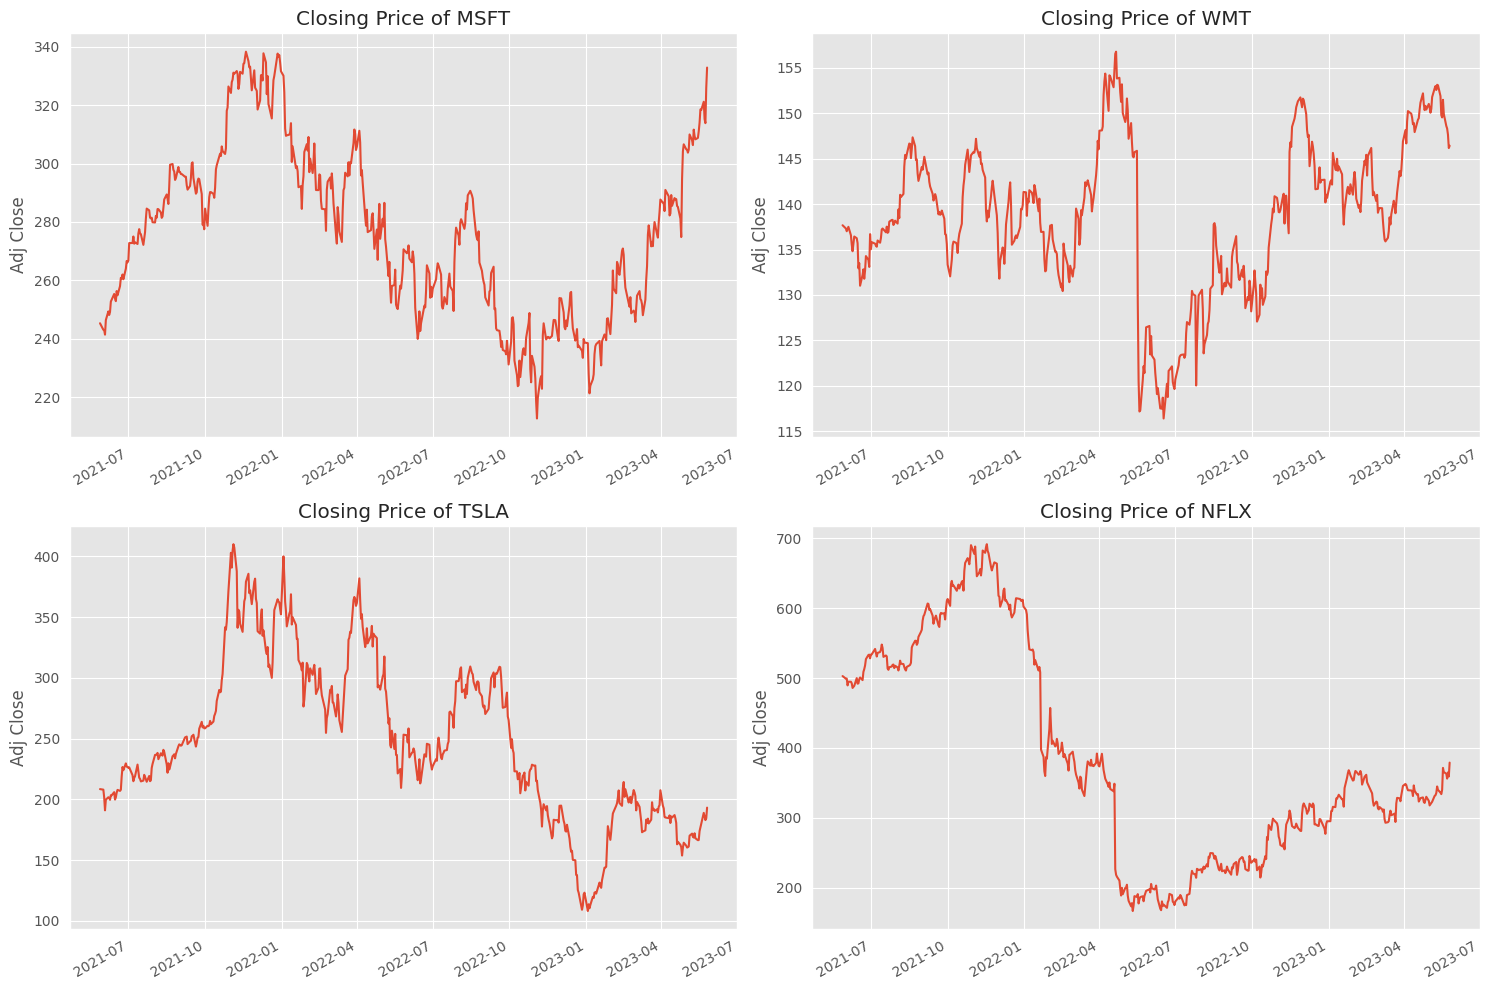

In [3]:
# Plot closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

tech_list = ['MSFT', 'WMT', 'TSLA', 'NFLX']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

##3.2 Volume of sales

In the context of stocks, the term "volume" refers to the number of shares that are traded during a given period of time. This is also sometimes referred to as "trading volume" or "volume of sales" in the stock market.

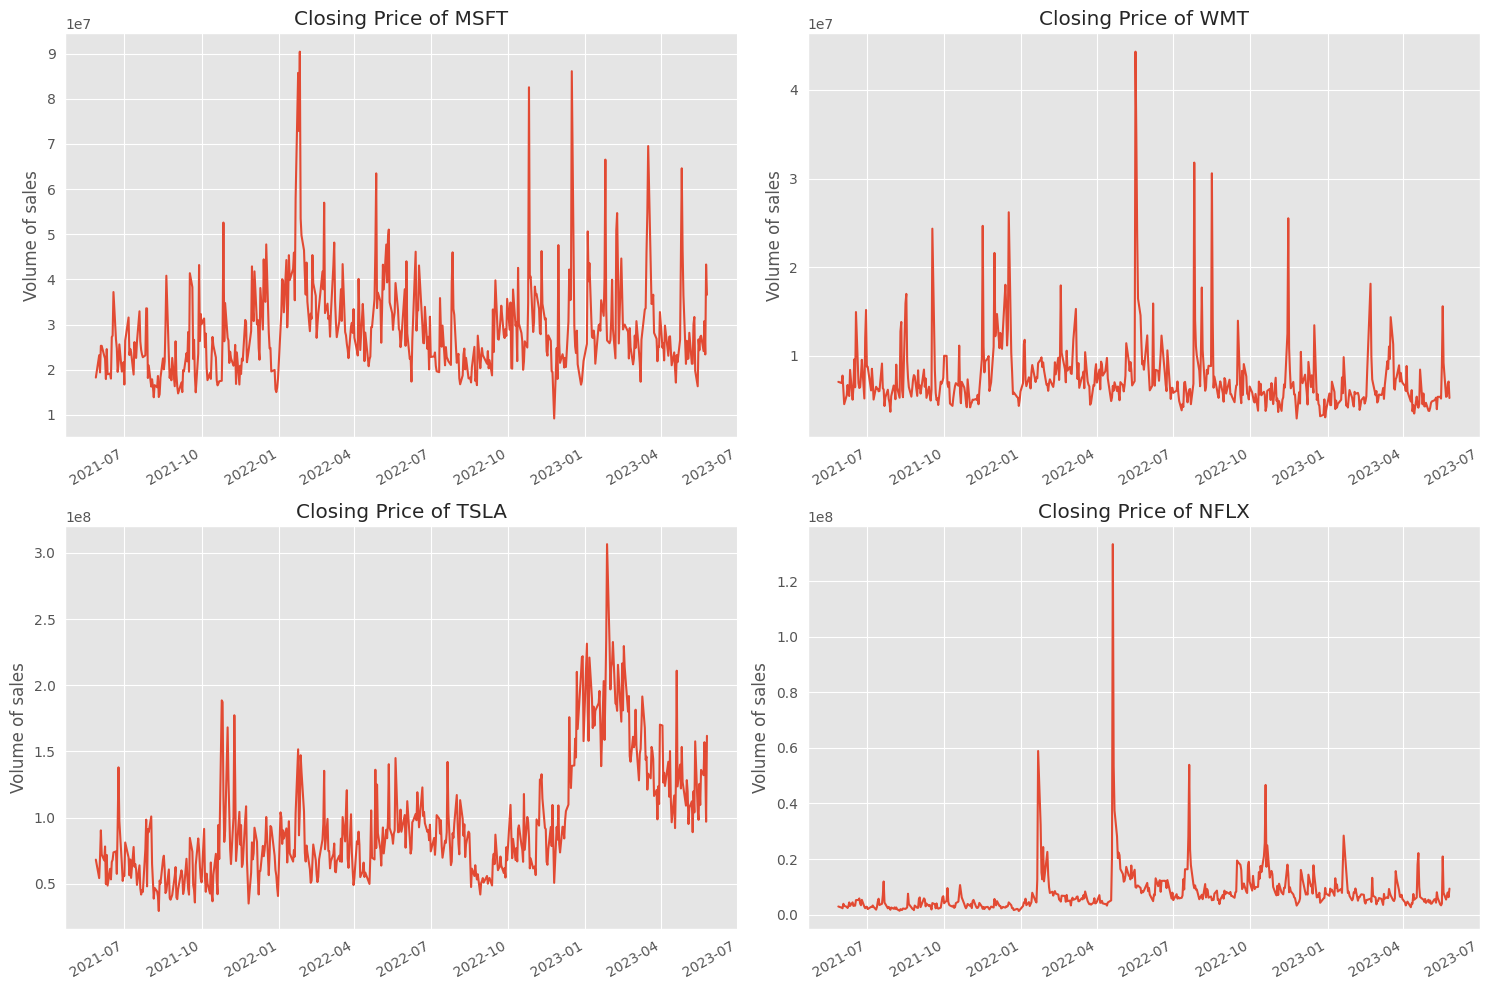

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

tech_list = ['MSFT', 'WMT', 'TSLA', 'NFLX']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume of sales')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

##3.3 Moving average (MA)

A moving average in the context of trading stocks is a commonly used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. It's a trend-following, or lagging, indicator because it is based on past prices.

A moving average is calculated by adding up the closing price of a stock for a certain number of time periods (like days, weeks, months, etc.) and then dividing this total by the number of time periods. The result is the average price of the security over the time period. The average is taken considering and specific period of time.

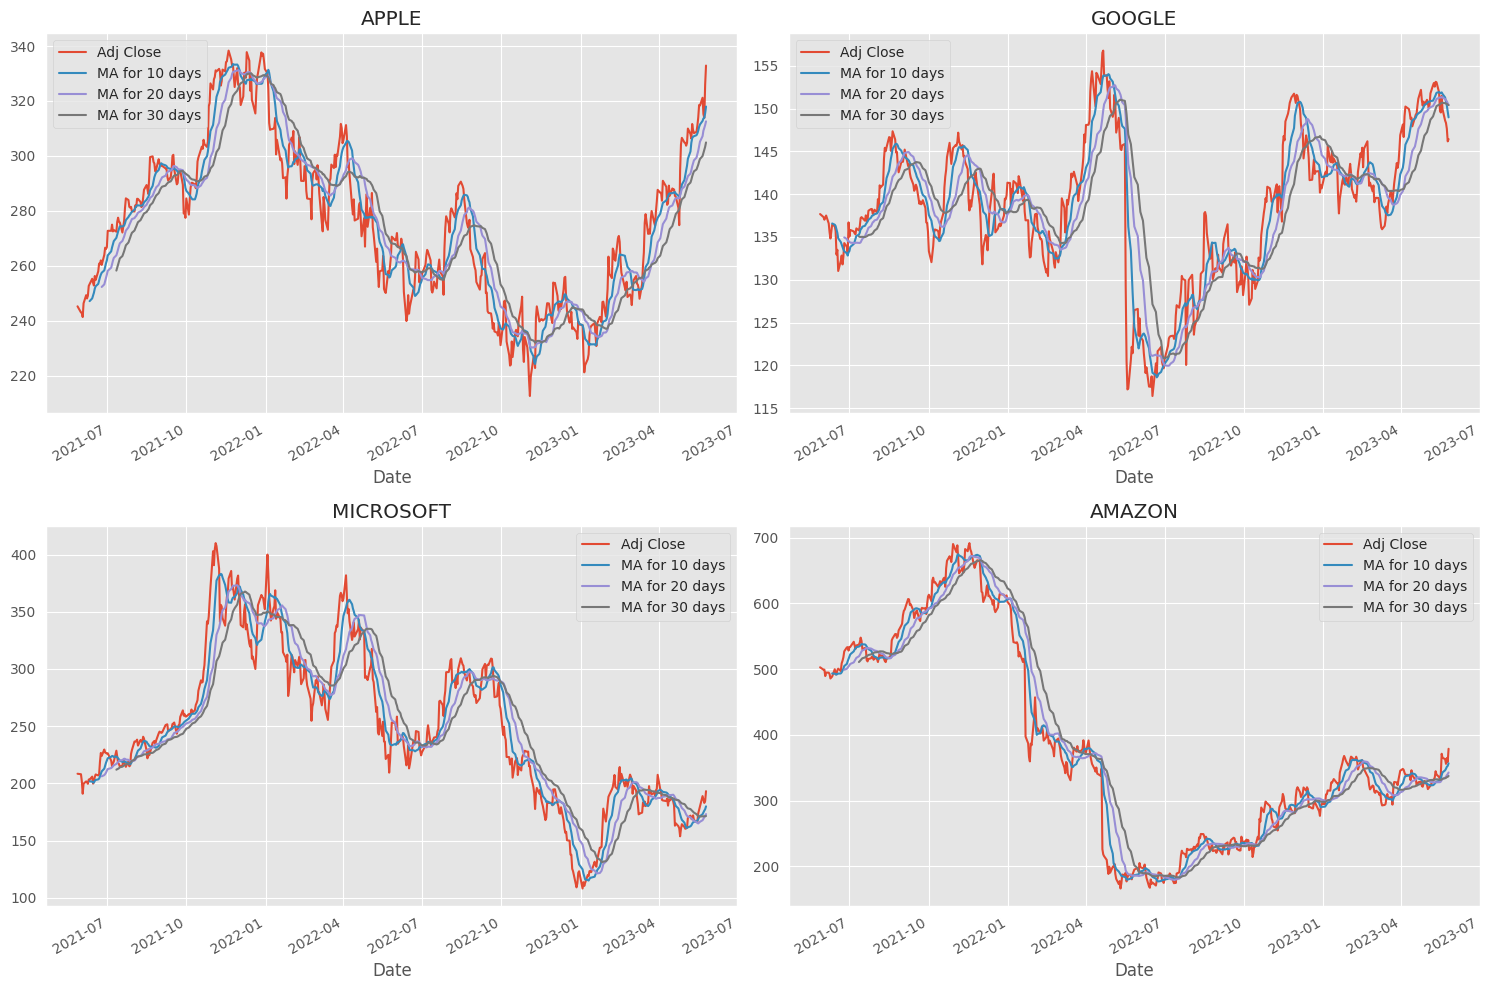

In [5]:
# Period time in days
ma_day = [10, 20, 30]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

WMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

The previous plots indicate that the best values to measure the moving average are 10 and 20 days, which capture trends in the data without noise.

#3.4 . Dialy Return of stocks

The daily return of a stock is a measure of the profit or loss made by a stock within a single trading day. It is calculated by comparing the closing price of the stock at the end of the trading day with its opening price at the start of the day. It's a way of measuring the day-to-day volatility and profitability of a stock.

The formula for calculating daily return is as follows:

Daily Return = (Closing Price - Opening Price) / Opening Price

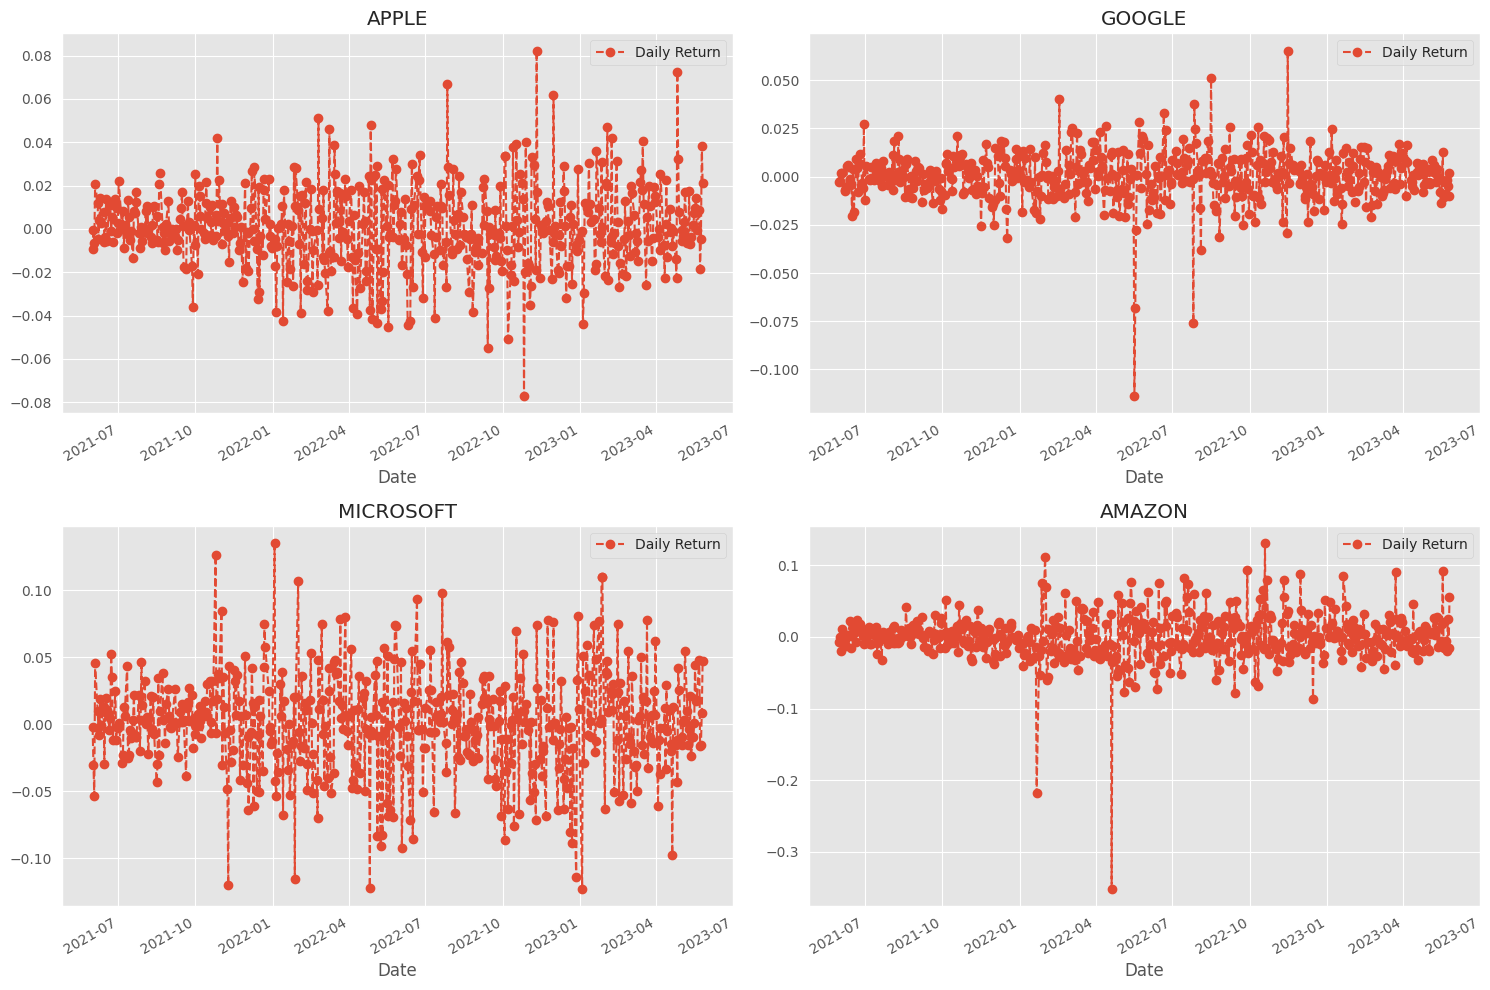

In [6]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

MSFT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

WMT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Daily return using a histogram.

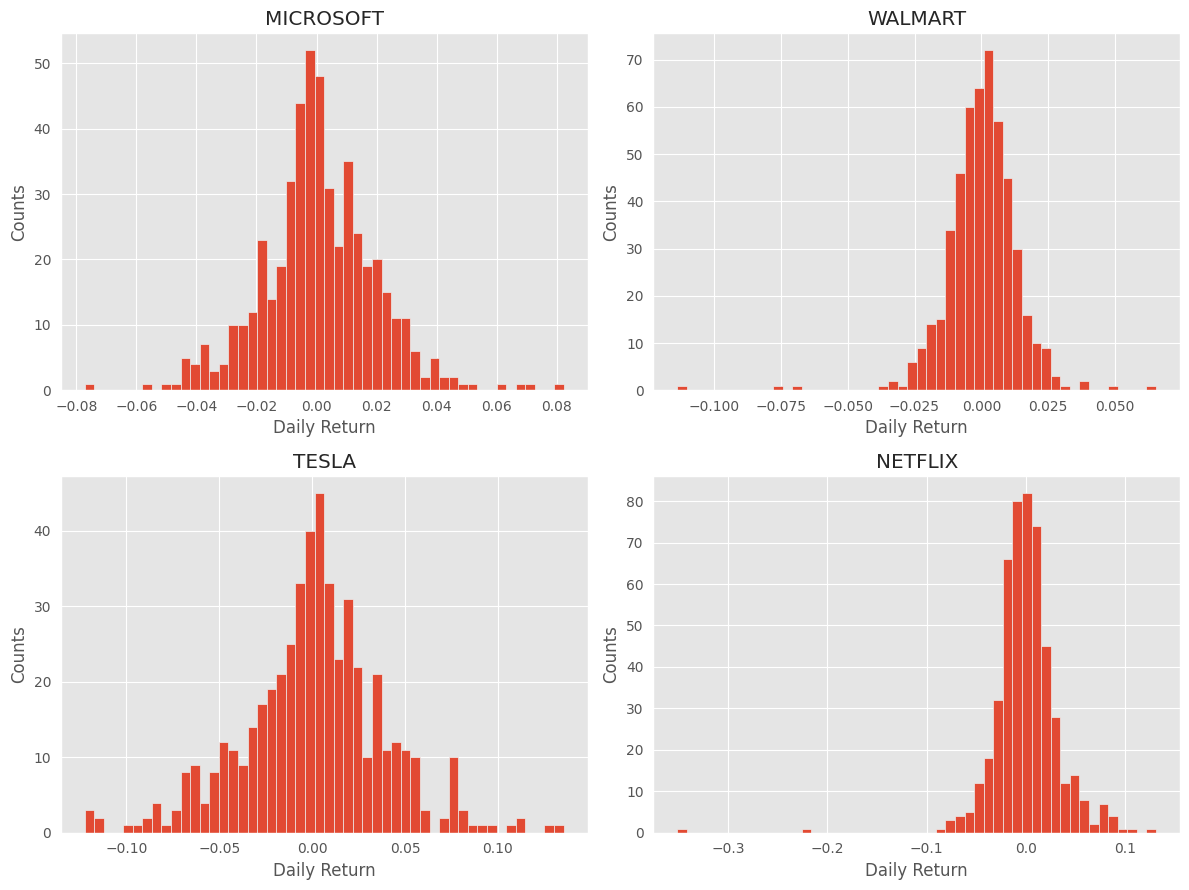

In [7]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Netflix shows the highest negative desviation of daily return.

#4. Correlation between different stocks closing prices

The correlation between closing prices of stocks refers to a statistical measure that represents the degree to which the movements of two different stocks are related. It's a way of quantifying the extent to which changes in the closing price of one stock are associated with changes in the closing price of another stock.

The correlation coefficient ranges from -1 to +1.

- A correlation of +1 implies that the two stock prices will move in the same direction 100% of the time. 
- A correlation of -1 implies that the two stock prices will move in opposite directions 100% of the time. 
- A correlation of zero means that there is no relationship between the movements of the two stocks.

In [8]:
# Closing prices into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Returns DataFrame
tech_rets = closing_df.pct_change()

[*********************100%***********************]  4 of 4 completed


##4.1. Daily Returns

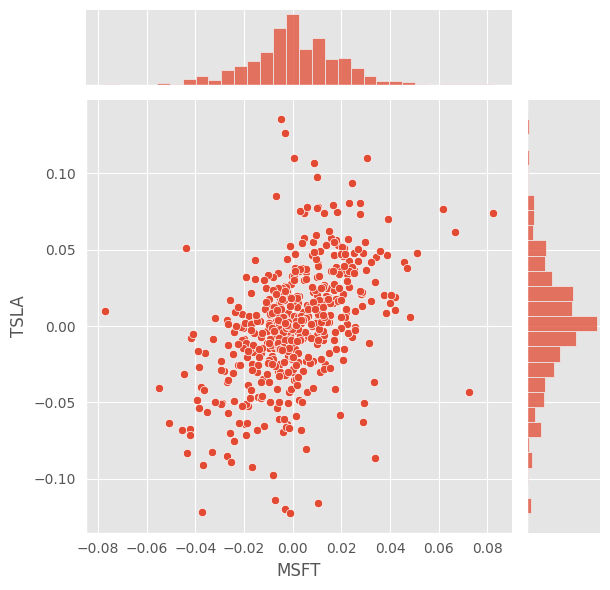

In [9]:
# Daily returns of Microsoft vs Tesla
sns.jointplot(x='MSFT', y='TSLA', data=tech_rets, kind='scatter')

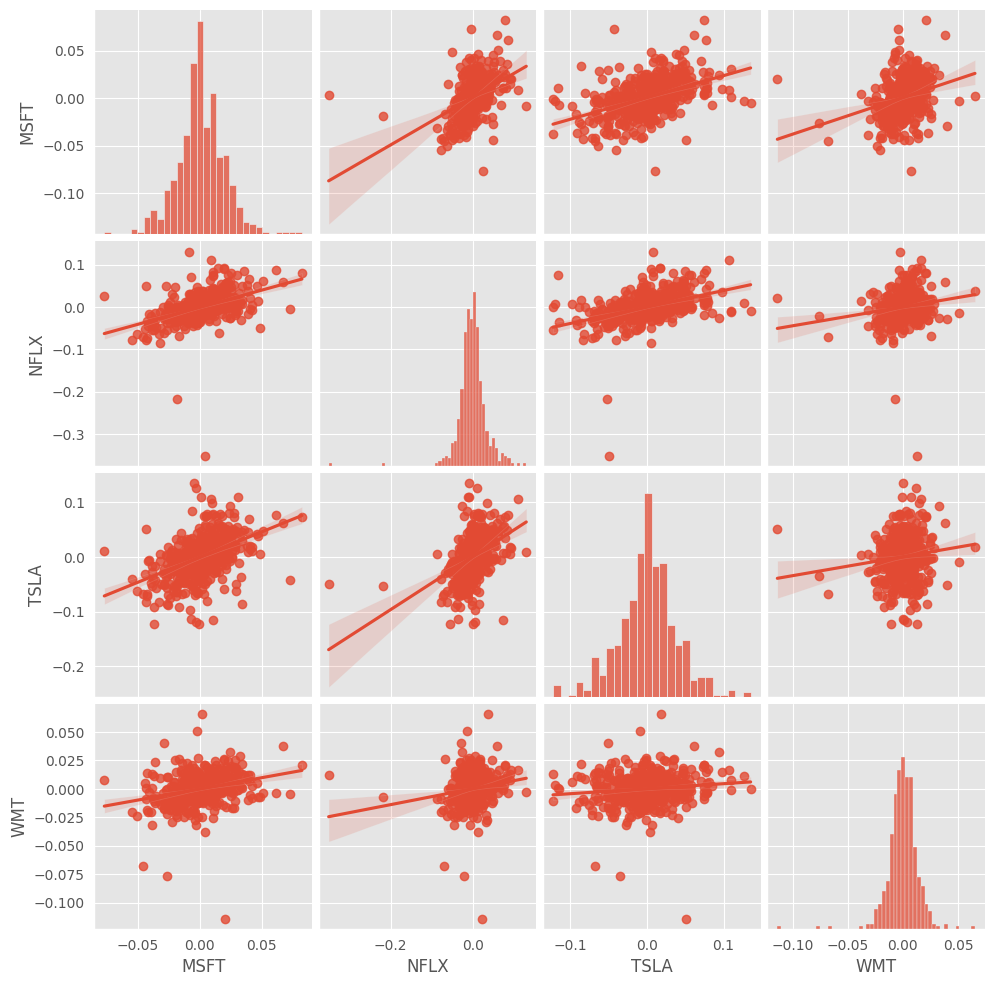

In [10]:
sns.pairplot(tech_rets, kind='reg')

The previous graphics indicates a correlation for the following daily return stocks: Microsoft-Tesla, Microsoft- Walmart, Microsoft-Netflix, and Tesla-Netflix,

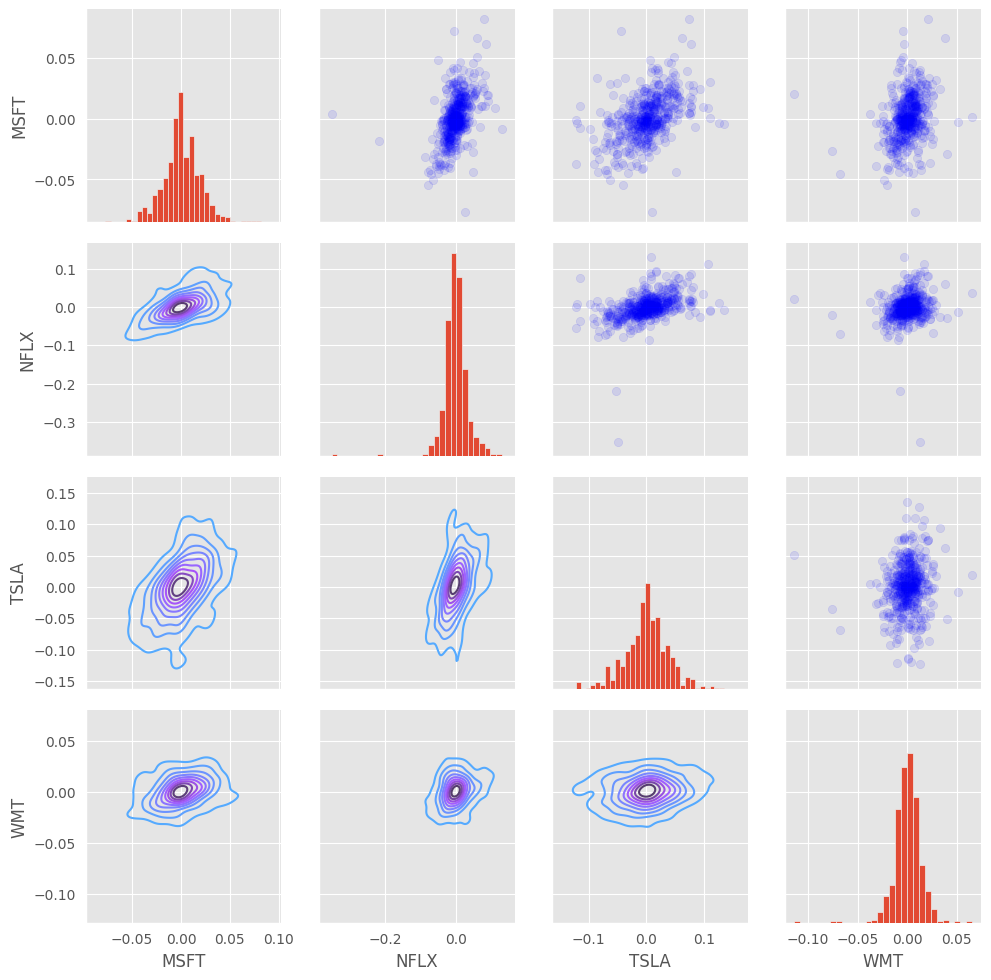

In [11]:
# Multiple plost to compare different stocks
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='blue', alpha= 0.1)

return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

#4.2. Closing Prices

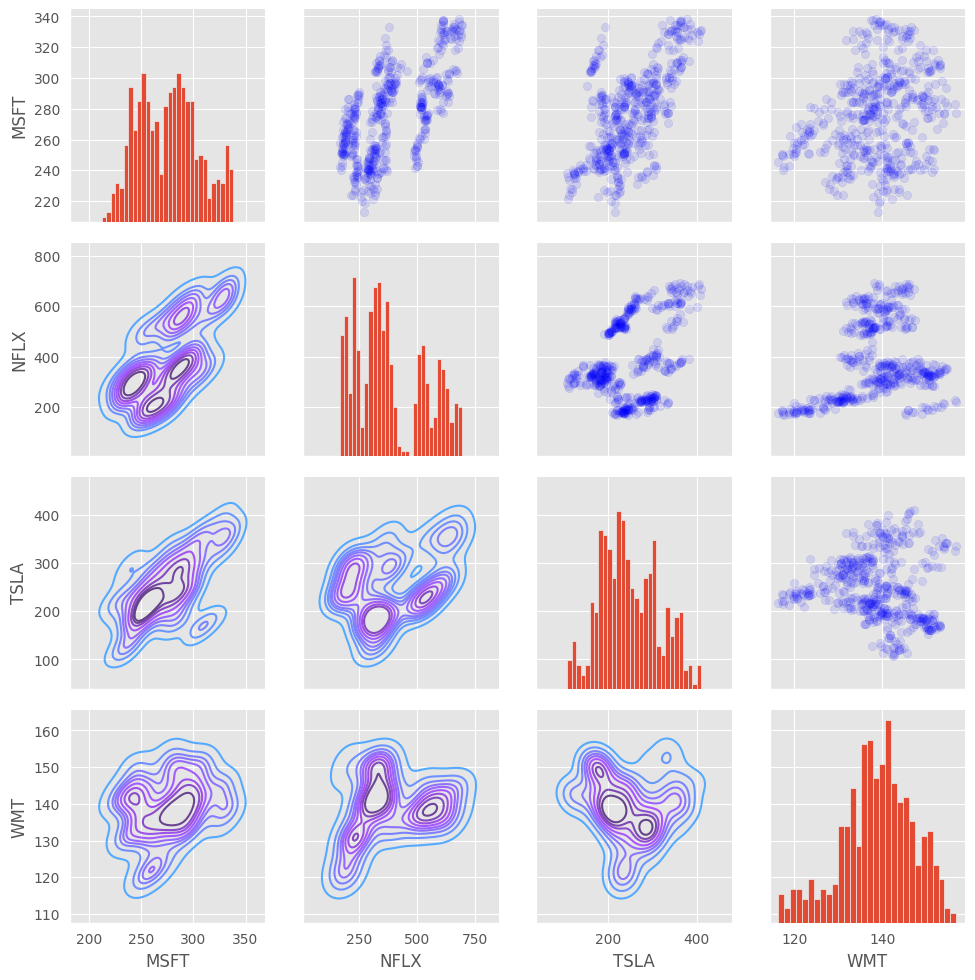

In [12]:
returns_fig = sns.PairGrid(closing_df)

# Upper triangle
returns_fig.map_upper(plt.scatter,color='blue', alpha= 0.1)

# Lower triangle 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

#4.3. Heatmap

Text(0.5, 1.0, 'Correlation of stock closing price')

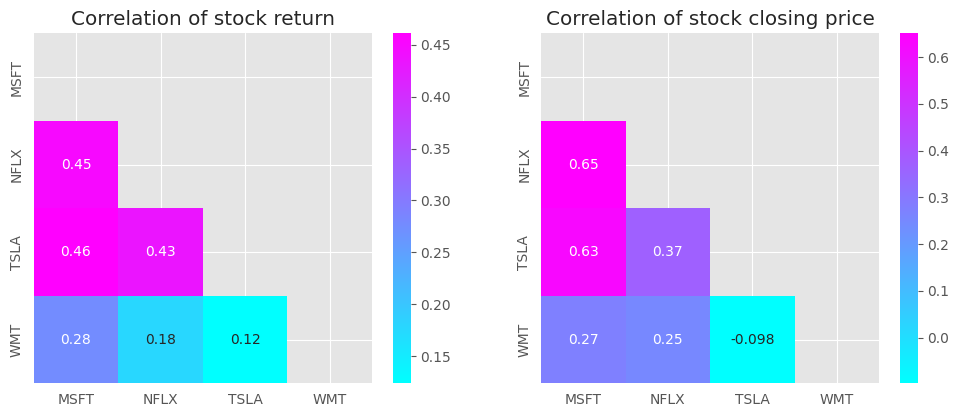

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
corr = tech_rets.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask= mask, annot=True, cmap='cool')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
corr_closing = closing_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr_closing,mask= mask, annot=True, cmap='cool')
plt.title('Correlation of stock closing price')

All the technology companies are positively correlated. Microsoft is strongly correlated with Tesla and Netflix, especially on closing price stock. On the other side, Walmart shows the lowest correlation coefficients.

#5. Return vs Risk?

One of the most basic methods to measure the investment risk is comparing the expected return with the standard deviation of the daily returns.

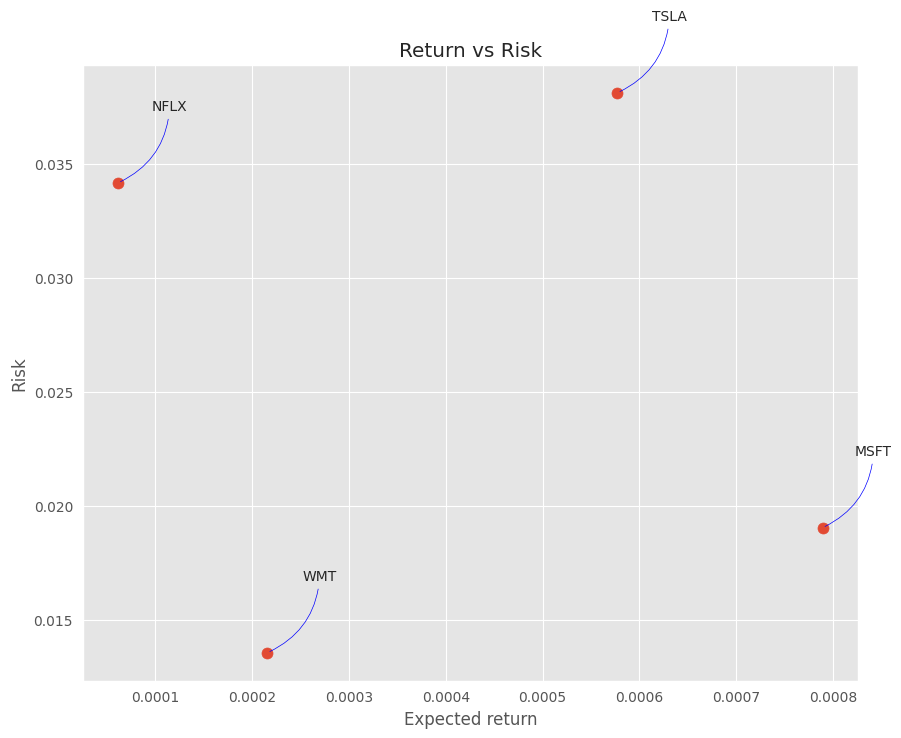

In [14]:
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Return vs Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Microsoft is the stock with the highest Expected Return/Risk ratio (best alternative to invest). On the other side, Netflix exhibits the lowest Expected Return/Risk ratio

#6. Close price prediction: Netflix

A Long Short-Term Memory (LSTM) network is a type of recurrent neural network (RNN) that's capable of learning long-term dependencies in sequence prediction problems. This makes it an ideal choice for time series forecasting problems, such as predicting future stock prices.

[*********************100%***********************]  1 of 1 completed


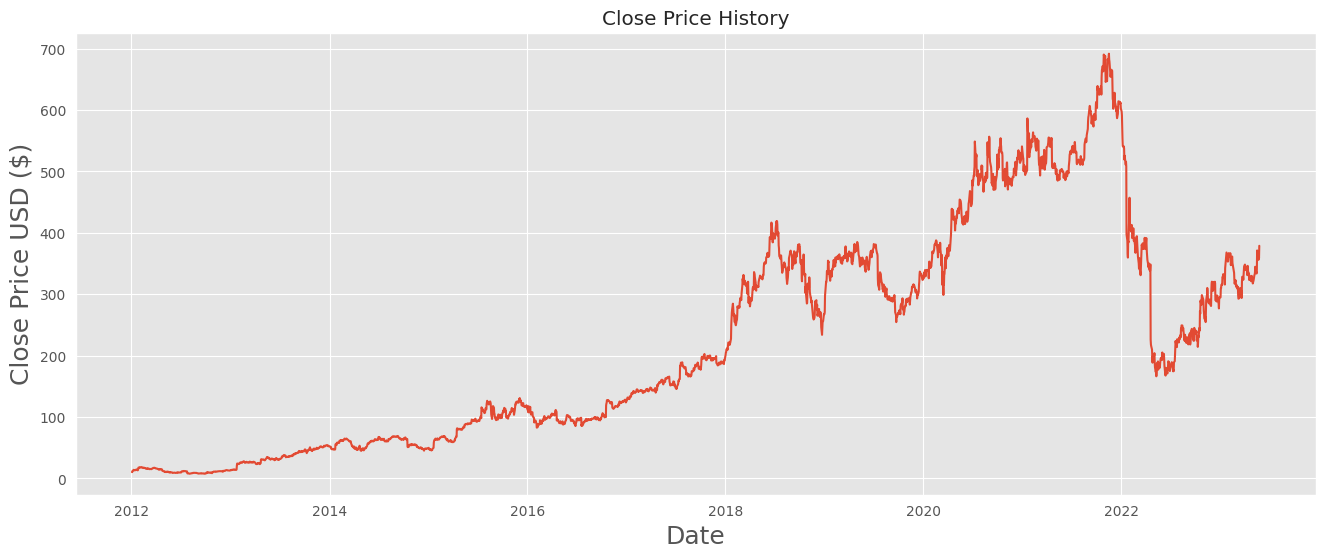

In [15]:
df = pdr.get_data_yahoo('NFLX', start='2012-01-01', end=datetime.now())
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the Close Prices
data = df.filter(['Close'])
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2726

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00385127],
       [0.00556596],
       [0.00532578],
       ...,
       [0.52216674],
       [0.51361416],
       [0.54267831]])

In [18]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
            
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2666/2666 [==============================] - 98s 36ms/step - loss: 0.0013


In [20]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 33ms/step


12.480440032727117

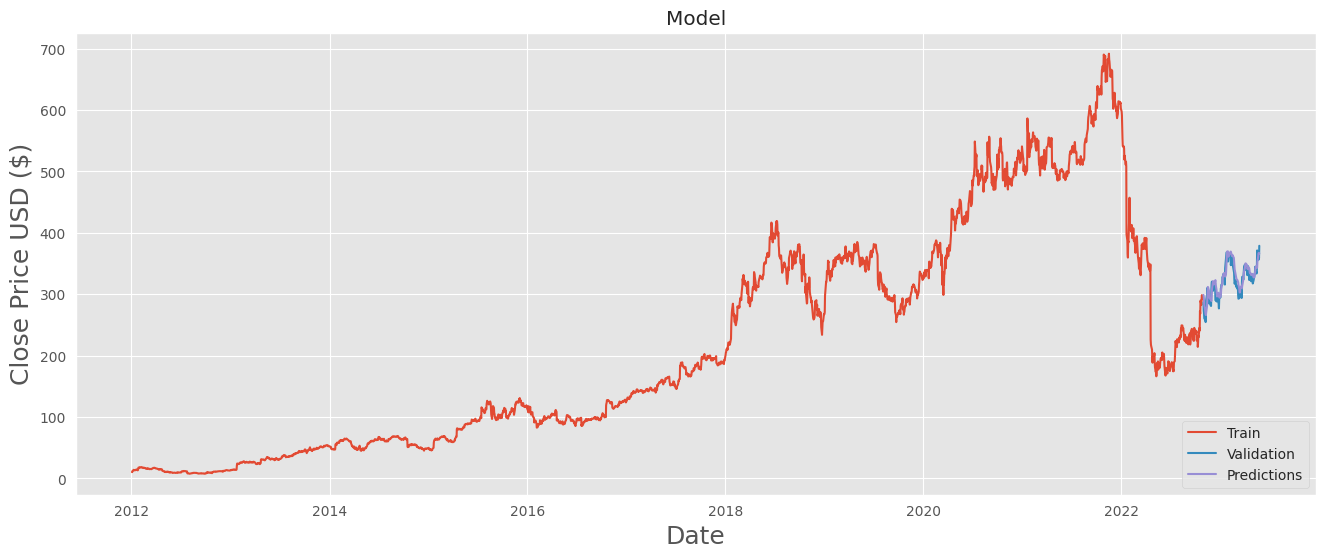

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid.head()

,Close,Predictions
Date,,
2022-11-01,286.750000,298.888550
2022-11-02,273.000000,295.773041
2022-11-03,269.059998,289.123260
2022-11-04,260.790009,282.147614
2022-11-07,258.600006,274.985077


In [23]:
def prediction (stock, start, train_fraction,epochs):
  df = pdr.get_data_yahoo(stock, start=start, end=datetime.now())
  data = df.filter(['Close'])
  dataset = data.values

  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * train_fraction ))
  
  # Scale data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]

  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
            
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=epochs)

  # Create the testing data set
  test_data = scaled_data[training_data_len - 60: , :]

  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title(stock)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
  plt.show()
  
  return print('RMSE:',rmse)

[*********************100%***********************]  1 of 1 completed
Epoch 1/4
2523/2523 [==============================] - 97s 37ms/step - loss: 0.0015
Epoch 2/4
2523/2523 [==============================] - 93s 37ms/step - loss: 6.3393e-04
Epoch 3/4
2523/2523 [==============================] - 92s 36ms/step - loss: 3.7568e-04
Epoch 4/4
9/9 [==============================] - 1s 36ms/step


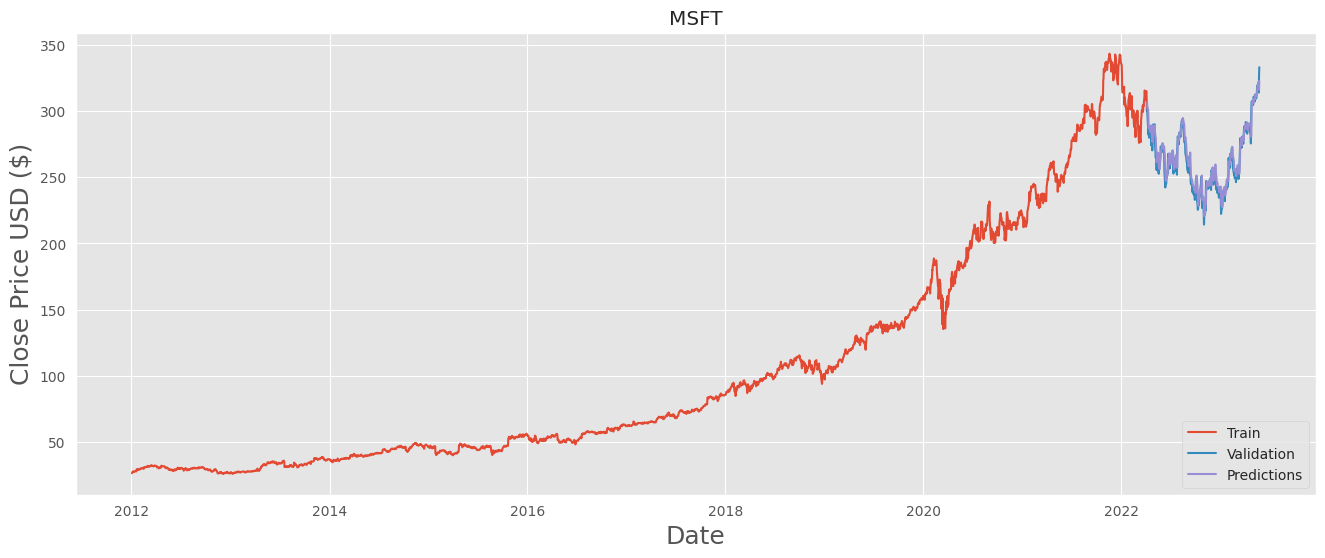

RMSE: 6.474837100173429
[*********************100%***********************]  1 of 1 completed
Epoch 1/4
2523/2523 [==============================] - 94s 36ms/step - loss: 0.0014
Epoch 2/4
2523/2523 [==============================] - 91s 36ms/step - loss: 6.3294e-04
Epoch 3/4
2523/2523 [==============================] - 93s 37ms/step - loss: 4.6042e-04
Epoch 4/4
9/9 [==============================] - 1s 36ms/step


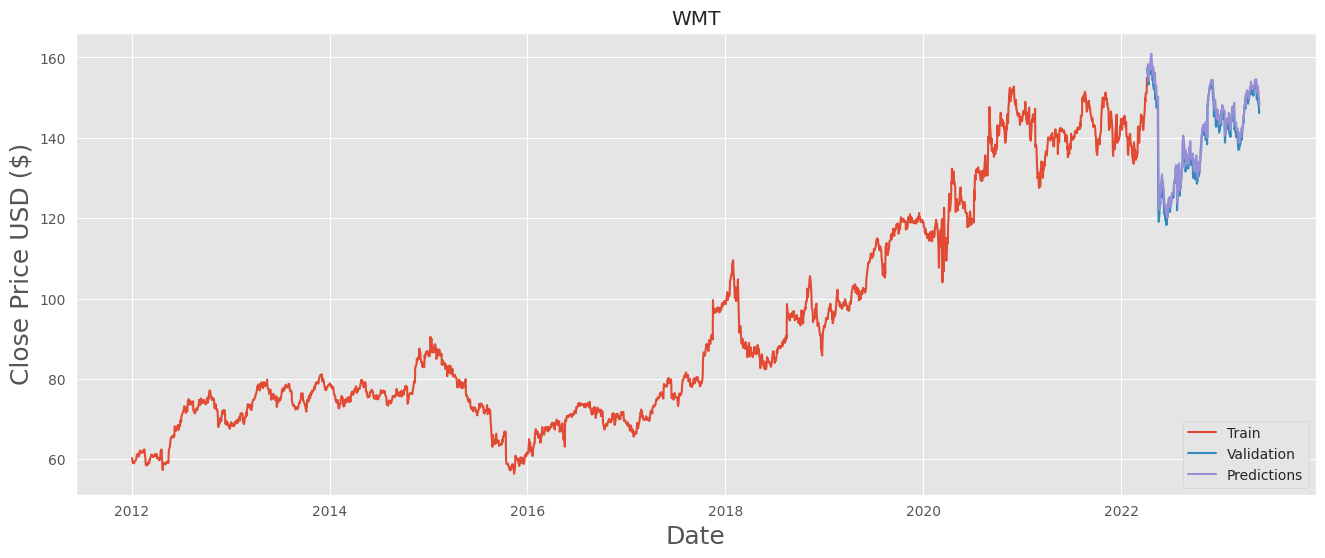

RMSE: 2.664816579107455
[*********************100%***********************]  1 of 1 completed
Epoch 1/4
2523/2523 [==============================] - 97s 37ms/step - loss: 0.0028
Epoch 2/4
2523/2523 [==============================] - 91s 36ms/step - loss: 6.2310e-04
Epoch 3/4
2523/2523 [==============================] - 91s 36ms/step - loss: 4.7124e-04
Epoch 4/4
9/9 [==============================] - 1s 38ms/step


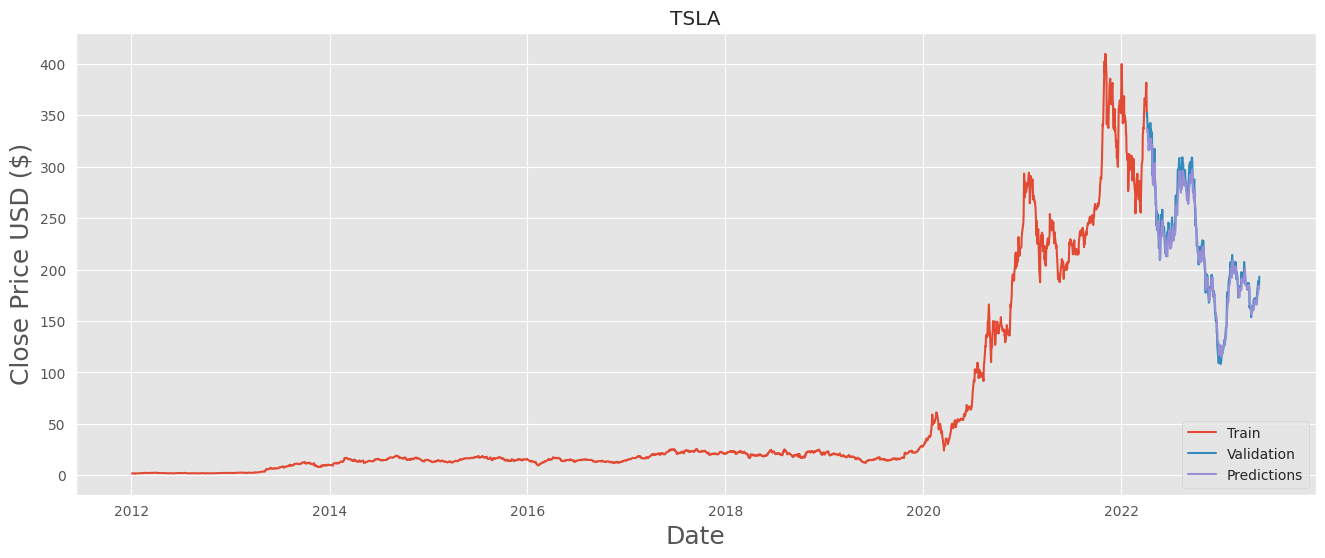

RMSE: 10.174023527350597
[*********************100%***********************]  1 of 1 completed
Epoch 1/4
2523/2523 [==============================] - 98s 37ms/step - loss: 0.0014
Epoch 2/4
2523/2523 [==============================] - 93s 37ms/step - loss: 5.4496e-04
Epoch 3/4
2523/2523 [==============================] - 93s 37ms/step - loss: 4.4042e-04
Epoch 4/4
9/9 [==============================] - 1s 36ms/step


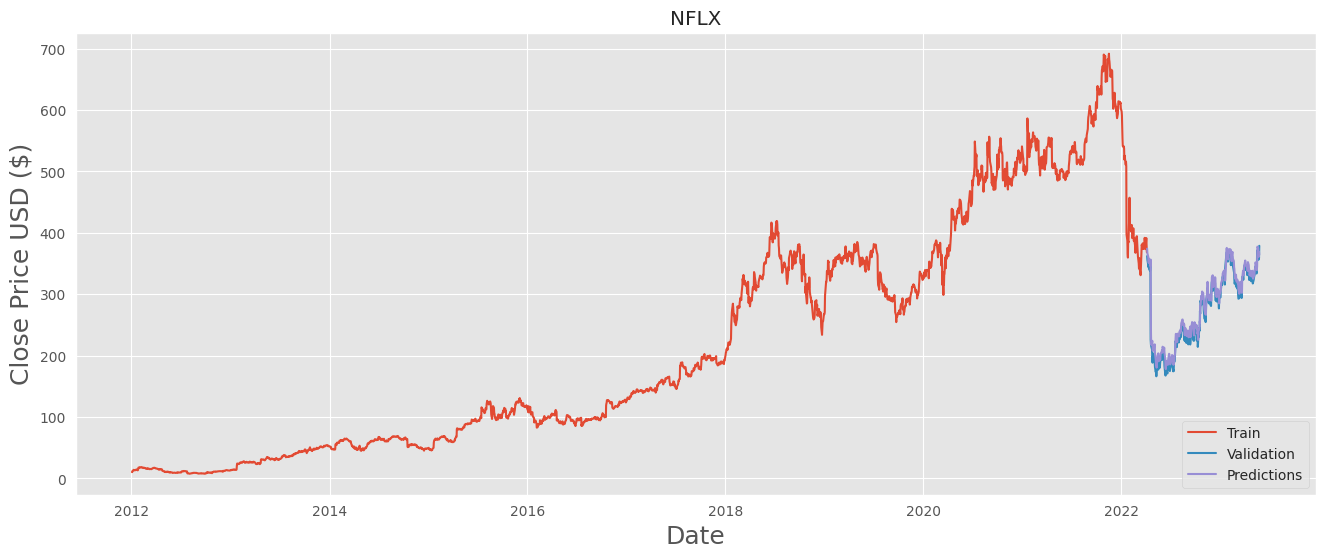

RMSE: 14.464403908478733


In [26]:
# Input Parameters
start = '2012-01-01'
train_fraction= 0.9
epochs = 4

for stock in stock_list: 
  prediction(stock,start,train_fraction,epochs)

In [ ]:
# Show the valid and predicted prices
#valid

#6. Summary
- Netflix shows the highest negative deviation of daily return. 
- All the technology companies are positively correlated. Microsoft is strongly correlated with Tesla and Netflix, especially on closing price stock. On the other side, Walmart shows the lowest correlation coefficients.
- Microsoft is the stock with the highest Expected Return/Risk ratio (best alternative to invest). On the other side, Netflix exhibits the lowest Expected Return/Risk ratio.
- The highest RMSE was 14.46, for Netflix. This observation indicates that the LSTM model can satisfactorily predict closing price stocks.

Credits:
[Fares Sayah](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook)